In [1]:
import pandas as pd
import pyarrow.parquet as pq
from numpy import nan
import numpy as np
import pyspark
import matplotlib.pyplot as plt

# Grid

In [3]:
grids = pd.read_csv('data/ITU_DATA/prognosis/grid_coordinates.csv') 
print(len(grids))
grids.head(5)

354


,grid,utm_x,utm_y
0,190,895390,6112543
1,191,899875,6128134
2,231,874801,6101548
3,232,879280,6117148
4,233,883767,6132746


# Weather
## Observations
We don't have the join table of municipal names and ids.

In [ ]:
observed_wind_speed_gust = pq.read_table('data/ITU_DATA/observations/observed_wind_speed_gust.parquet').to_pandas()

In [ ]:
print(len(observed_wind_speed_gust))
observed_wind_speed_gust.head(5)

In [ ]:
observed_wind_speed_high10 = pq.read_table('data/ITU_DATA/observations/observed_wind_speed_high10.parquet').to_pandas()
print(len(observed_wind_speed_high10))
observed_wind_speed_high10.head(10)

## progbisis ENetNEA
resolution in 1 hour    
data from this model since 2018-02-22.

In [ ]:
wind_speed_10m = pq.read_table('data/ITU_DATA/prognosis/ENetNEA/wind_speed_10m.parquet').to_pandas().reset_index()

In [ ]:
wind_speed_10m.head()

In [ ]:
wind_speed_10m = wind_speed_10m.drop_duplicated(['index'], keep = last)

In [ ]:
wind_speed_10m['index'] = wind_speed_10m['index'].astype(str)
wind_speed_10m[['date','time']] = wind_speed_10m['index'].str.split(' ', expand = True)
   

In [ ]:
wind_direction_10m = pq.read_table('data/ITU_DATA/prognosis/ENetNEA/wind_direction_10m.parquet').to_pandas().reset_index()

In [ ]:
wind_direction_10m.head(30)

In [ ]:
temperatur_2m = pq.read_table('data/ITU_DATA/prognosis/ENetNEA/temperatur_2m.parquet').to_pandas().reset_index()

In [ ]:
temperatur_2m.head(10)

In [ ]:
temperatur_100m = pq.read_table('data/ITU_DATA/prognosis/ENetNEA/temperatur_100m.parquet').to_pandas().reset_index()

In [ ]:
temperatur_100m.head(10)

# Windmill

In [2]:
windmills = pd.read_csv('data/windmill_cleaned.csv')

In [3]:
windmills

,GSRN,Turbine_type,Parent_GSRN,BBR_municipal,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,Out_service,grid,grid_in_range,Land_cover,Slope,Elevation,Roughness
0,570714700000001659,M,5.707147e+17,360,HAV,635831.57,6093877.23,450.0,35.0,37.5,2017-02-20,815,"855,813,771,856,729,730,814,731,773,815,857,85...",210.0,-1.0,-1.0,0.0
1,570714700000001666,M,5.707147e+17,360,HAV,636028.76,6093650.72,450.0,35.0,37.5,2017-02-20,815,"855,813,771,856,729,730,814,731,773,815,857,85...",210.0,-1.0,-1.0,0.0
2,570714700000001673,M,5.707147e+17,360,HAV,636226.42,6093426.62,450.0,35.0,37.5,2017-02-20,815,"855,813,771,856,729,730,814,731,773,815,857,85...",210.0,-1.0,-1.0,0.0
3,570714700000001680,M,5.707147e+17,360,HAV,636423.93,6093200.36,450.0,35.0,37.5,2017-02-20,815,"855,813,771,856,729,730,814,731,773,815,857,85...",210.0,-1.0,-1.0,0.0
4,570714700000001697,M,5.707147e+17,360,HAV,636620.72,6092973.61,450.0,35.0,37.5,2017-02-20,814,"855,813,771,856,729,730,814,731,773,815,857,85...",210.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9203,571313174116645946,H,NaN,350,NaN,NaN,NaN,10.0,7.1,21.3,NaN,0,NaN,NaN,NaN,NaN,NaN
9204,571313179100075143,H,NaN,219,NaN,NaN,NaN,10.0,13.0,18.2,NaN,0,NaN,NaN,NaN,NaN,NaN
9205,571313179100118352,H,NaN,260,NaN,NaN,NaN,10.0,7.0,18.0,NaN,0,NaN,NaN,NaN,NaN,NaN
9206,571313179100992129,H,NaN,250,NaN,NaN,NaN,25.0,11.0,23.5,NaN,0,NaN,NaN,NaN,NaN,NaN


## Windfarm Capacity distribution

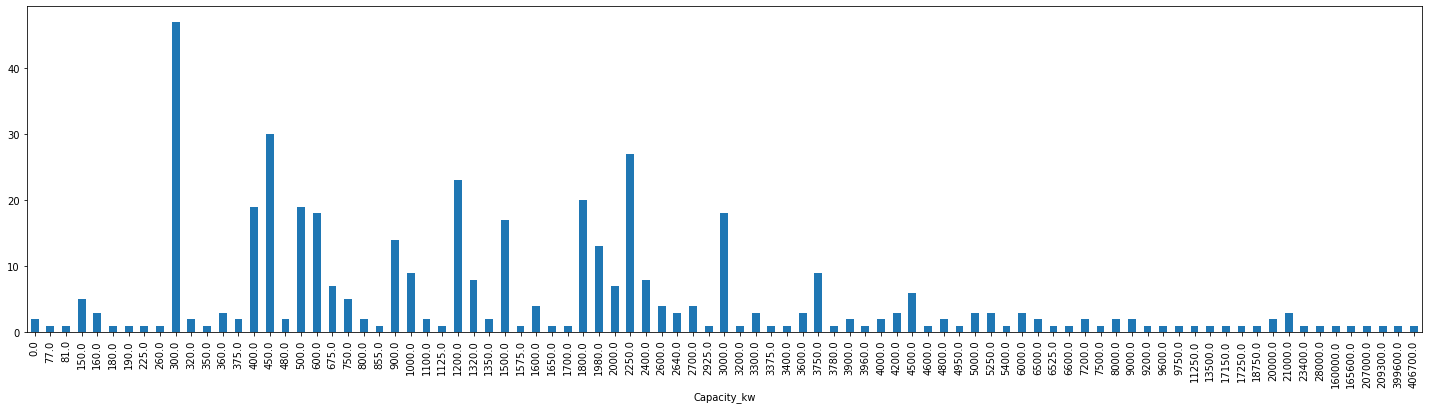

In [24]:
plt.figure(figsize=(25,6))
windmills[windmills['Turbine_type']=='P'].groupby("Capacity_kw")["GSRN"].count().plot.bar()

## Single Windmill Capacity distribution

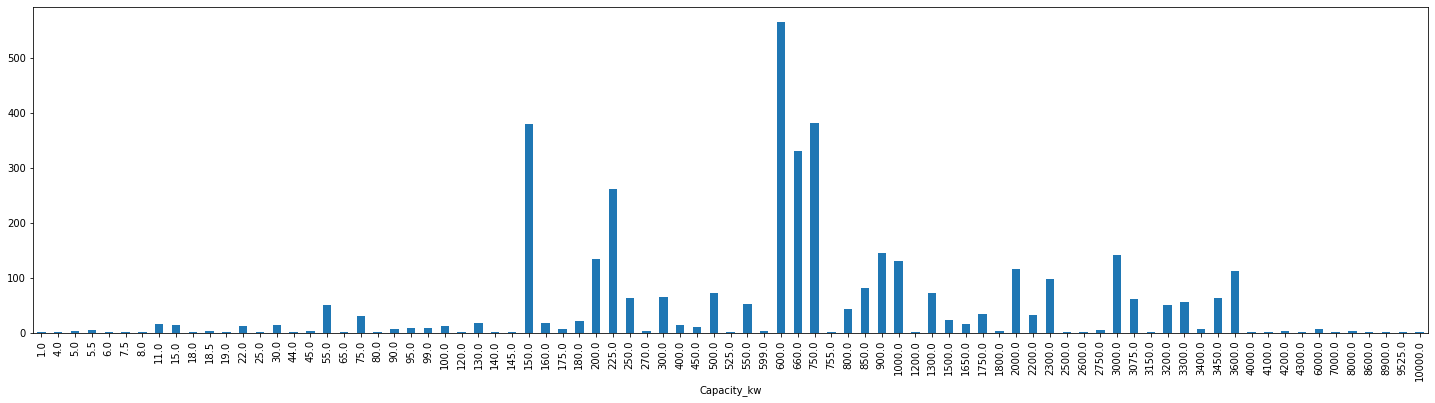

In [25]:
plt.figure(figsize=(25,6))
windmills[windmills['Turbine_type']=='W'].groupby("Capacity_kw")["GSRN"].count().plot.bar()

In [30]:
windmills[windmills['Turbine_type']=='W'].groupby("Roughness")["GSRN"].count()

Roughness
0.000       51
0.005        1
0.100     3553
0.300      254
1.000       16
1.500       44
11.000      23
Name: GSRN, dtype: int64

## Single Windmill Geo distribution

In [31]:
windmills[windmills['Turbine_type']=='W'].groupby("Slope")["GSRN"].count()

Slope
-1.000000       13
 0.000000     1497
 1.012750      458
 1.432096      269
 2.024868       89
 2.263636      433
 2.862405      303
 3.035724      199
 3.199601      299
 3.646971       52
 4.044691       41
 4.168740       56
 4.289154       15
 4.520227       21
 5.051153       27
 5.150652       33
 5.438008       12
 5.710593       14
 5.885129       16
 6.054499        8
 6.137380        7
 6.379370       13
 6.457955        9
 6.762861        4
 7.054132        6
 7.125016        2
 7.264627        3
 7.333393        2
 7.667577        3
 7.860959        4
 8.049467        2
 8.111279        8
 8.293805        4
 8.530766        1
 8.588925        3
 8.646670        4
 9.256682        1
 9.520203        1
 10.073967       1
 10.779772       1
 11.048352       1
 11.309933       1
 11.690208       1
 12.017035       1
 12.334205       1
 12.942409       1
 13.089463       1
 15.345950       1
Name: GSRN, dtype: int64

# Settlement
resolution in 15 mins

In [32]:
windmills[windmills['Turbine_type']=='W'].groupby("Elevation")["GSRN"].count()

Elevation
-1.000000       13
 0.000000      132
 0.010000        1
 0.016311        1
 0.100000        1
              ... 
 118.000000      2
 119.000000      1
 120.035751      1
 163.070999      1
 167.000000      1
Name: GSRN, Length: 1640, dtype: int64

## Clustering

In [34]:
cls_data = windmills[windmills['Turbine_type']=='W'][['GSRN', 'Roughness', 'Elevation', 'Slope']]

In [37]:
cls_data[['Roughness', 'Elevation', 'Slope']].corr()

,Roughness,Elevation,Slope
Roughness,1.000000,-0.072179,-0.024050
Elevation,-0.072179,1.000000,0.250951
Slope,-0.024050,0.250951,1.000000


In [38]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [46]:
feat_cols = ["Roughness"]
cls_df = cls_data[feat_cols]
# windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)
# k = 2, 5
sc = SpectralClustering(n_clusters=2,random_state=1,n_init=10)
clusters = sc.fit_predict(cls_df)

silhouette_avg = silhouette_score(cls_df, clusters)
print(silhouette_avg)

0.9938764471472898


In [51]:
feat_cols = ["Slope"]
cls_df = cls_data[feat_cols]
# windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)

sc = SpectralClustering(n_clusters=2,random_state=1,n_init=10)
clusters = sc.fit_predict(cls_df)

silhouette_avg = silhouette_score(cls_df, clusters)
print(silhouette_avg)

0.8127731803855078


In [58]:
feat_cols = ["Elevation"]
cls_df = cls_data[feat_cols]
# windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)

sc = SpectralClustering(n_clusters=2,random_state=1,n_init=10)
clusters = sc.fit_predict(cls_df)

silhouette_avg = silhouette_score(cls_df, clusters)
print(silhouette_avg)

0.7868384460808586


In [ ]:
settlement_2018 = pq.read_table('data/ITU_DATA/settlement/2018.parquet', columns=['GSRN','VAERDI','TIME_CET']).to_pandas()

In [ ]:
settlement_2018 = settlement_2018.astype({'VAERDI':'float16'})

In [ ]:
len(pd.unique(settlement_2018['GSRN']))

In [ ]:
settlement_2018

In [ ]:
settlement_2018 = settlement_2018[settlement_2018['VAERDI'] > 0]

In [ ]:
settlement_2018

Number of VAERDI == 0 is 38804490.  25% in total 

In [ ]:
155208851-116404361

In [ ]:
(155208851-116404361) / 155208851

In [ ]:
settlement_2018['month'] = settlement_2018['TIME_CET'].apply(lambda x: x[5:7])
settlement_2018['day'] = settlement_2018['TIME_CET'].apply(lambda x: x[0:10])

## in HAV P Windmills

In [ ]:
windmills = pd.read_csv('data/windmill_cleaned.csv').astype({'GSRN':'str'})
windmills_P = windmills[windmills['Turbine_type'] == 'P'][windmills['Placement'] == 'HAV'][['GSRN']]
settlement_2018_P = pd.merge(settlement_2018, windmills_P, how='inner', on='GSRN')
settlement_2018_W = settlement_2018_W.astype({'VAERDI':'float'})
settlement_2018_month = settlement_2018_P[['VAERDI','month']].groupby('month').sum()
settlement_2018_month.plot(figsize=(12,6),kind='line')

## in LAND P Windmills

In [ ]:
windmills_P = windmills[windmills['Turbine_type'] == 'P'][windmills['Placement'] == 'LAND'][['GSRN']]

In [ ]:
settlement_2018_P = pd.merge(settlement_2018, windmills_P, how='inner', on='GSRN')
settlement_2018_P = settlement_2018_P.astype({'VAERDI':'float'})

In [ ]:
settlement_2018_month = settlement_2018_P[['VAERDI','month']].groupby('month').sum()
settlement_2018_month.plot(figsize=(12,6),kind='line')

In [ ]:
settlement_2018_P = ''
windmills_P = ''

## in HAV W Windmills

In [ ]:
windmills_W = windmills[windmills['Turbine_type'] == 'W'][windmills['Placement'] == 'HAV'][['GSRN']]
settlement_2018_W = pd.merge(settlement_2018, windmills_W, how='inner', on='GSRN')

In [ ]:
settlement_2018_W = settlement_2018_W.astype({'VAERDI':'float'})

In [ ]:
settlement_2018_month = settlement_2018_W[['VAERDI','month']].groupby('month').sum()
settlement_2018_month.plot(figsize=(12,6),kind='line')

## in LAND W Windmills

In [ ]:
windmills_W = windmills[windmills['Turbine_type'] == 'W'][windmills['Placement'] == 'LAND'][['GSRN']]
settlement_2018_W = pd.merge(settlement_2018, windmills_W, how='inner', on='GSRN')

In [ ]:
settlement_2018_W = settlement_2018_W.astype({'VAERDI':'float'})

In [ ]:
settlement_2018_month = settlement_2018_W[['VAERDI','month']].groupby('month').sum()
settlement_2018_month.plot(figsize=(12,6),kind='line')

In [ ]:
settlement_2018_W = ''
windmills_W = ''

# Settlement 2019

In [ ]:
settlement_2019 = pq.read_table('data/ITU_DATA/settlement/2019.parquet', columns=['GSRN','VAERDI','TIME_CET']).to_pandas()

In [ ]:
settlement_2019 = settlement_2019.replace([np.inf, -np.inf], np.nan).dropna(subset=['VAERDI'])

In [ ]:
settlement_2019 = settlement_2019.astype({'VAERDI':'float32'})

In [ ]:
len(pd.unique(settlement_2019['GSRN']))

In [ ]:
settlement_2019

In [ ]:
settlement_2019 = settlement_2019[settlement_2019['VAERDI'] > 0]

In [ ]:
settlement_2019

In [ ]:
154380222-119597083

In [ ]:
(154380222-119597083)/154380222

In [ ]:
settlement_2019['month'] = settlement_2019['TIME_CET'].apply(lambda x: x[5:7])
# settlement_2019['day'] = settlement_2019['TIME_CET'].apply(lambda x: x[0:10])

## in HAV P Windmills

In [ ]:
windmills = pd.read_csv('data/windmill_cleaned.csv').astype({'GSRN':'str'})

In [ ]:
windmills_P = windmills[windmills['Turbine_type'] == 'P'][windmills['Placement'] == 'HAV'][['GSRN']]
settlement_2019_P = pd.merge(settlement_2019, windmills_P, how='inner', on='GSRN')
settlement_2019_P = settlement_2019_P.astype({'VAERDI':'float'})
settlement_2019_P = settlement_2019_P.replace([np.inf, -np.inf], np.nan).dropna(subset=['VAERDI'])

In [ ]:
settlement_2019_month = settlement_2019_P[['VAERDI','month']].groupby('month').sum()
settlement_2019_month.plot(figsize=(12,6), kind='line')

## in LAND P Windmills

In [ ]:
windmills_P = windmills[windmills['Turbine_type'] == 'P'][windmills['Placement'] == 'LAND'][['GSRN']]
settlement_2019_P = pd.merge(settlement_2019, windmills_P, how='inner', on='GSRN')
settlement_2019_P = settlement_2019_P.astype({'VAERDI':'float'})

In [ ]:
settlement_2019_month = settlement_2019_P[['VAERDI','month']].groupby('month').sum()
settlement_2019_month.plot(figsize=(12,6), kind='line')

## in HAV W Windmills

In [ ]:
windmills_P = windmills[windmills['Turbine_type'] == 'W'][windmills['Placement'] == 'HAV'][['GSRN']]
settlement_2019_P = pd.merge(settlement_2019, windmills_P, how='inner', on='GSRN')
settlement_2019_P = settlement_2019_P.astype({'VAERDI':'float'})
# settlement_2019_P = settlement_2019_P.replace([np.inf, -np.inf], np.nan).dropna(subset=['VAERDI'])

In [ ]:
settlement_2019_month = settlement_2019_P[['VAERDI','month']].groupby('month').sum()
settlement_2019_month.plot(figsize=(12,6), kind='line')

## in LAND W Windmills

In [ ]:
windmills_P = windmills[windmills['Turbine_type'] == 'W'][windmills['Placement'] == 'LAND'][['GSRN']]
settlement_2019_P = pd.merge(settlement_2019, windmills_P, how='inner', on='GSRN')
# settlement_2019_P = settlement_2019_P.astype({'VAERDI':'float'})
# settlement_2019_P = settlement_2019_P.replace([np.inf, -np.inf], np.nan).dropna(subseht=['VAERDI'])

In [ ]:
settlement_2019_month = settlement_2019_P[['VAERDI','month']].groupby('month').sum()
settlement_2019_month.plot(figsize=(12,6), kind='line')